Chennai Mathematical InstituteH1, Sipcot IT Park, Siruseri, Kelambakkam, Tamil Nadu 603103Data­
### Driven Prediction of Fraudulent Firm

importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math
import sklearn.tree
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

importing data

In [3]:
data_path="https://raw.githubusercontent.com/shadow23-cmi/Data-Driven-Prediction-of-Fraudulent-Firm/main/Data.csv"
data=pd.read_csv(data_path)

In [4]:
data

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,2,0.40,2,0.89,5.0,2,0.00,2,2,0,2,0,2,2.0,0
772,55.57,16,0.47,2,0.37,2,0.84,5.0,2,0.00,2,2,0,2,0,2,2.0,0
773,55.57,14,0.24,2,0.04,2,0.28,5.0,2,0.00,2,2,0,2,0,2,2.0,0
774,55.57,18,0.20,2,0.00,2,0.20,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [246]:
data.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B',
       'TOTAL', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk'],
      dtype='object')

In [247]:
to_drop=["SCORE_A","SCORE_B","Marks","MONEY_Marks","LOSS_SCORE","History_score","Score"]
for column in to_drop:
    data.drop(column,inplace=True,axis=1)

In [340]:
data.head()

,Sector_score,LOCATION_ID,PARA_A,PARA_B,TOTAL,numbers,Money_Value,District,Loss,History,Risk
0,3.89,23,4.18,2.50,6.68,5.0,3.38,2,0,0,1
1,3.89,6,0.00,4.83,4.83,5.0,0.94,2,0,0,0
2,3.89,6,0.51,0.23,0.74,5.0,0.00,2,0,0,0
3,3.89,6,0.00,10.80,10.80,6.0,11.75,2,0,0,1
4,3.89,6,0.00,0.08,0.08,5.0,0.00,2,0,0,0


In [249]:
data.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers',
       'Money_Value', 'District', 'Loss', 'History', 'Risk'],
      dtype='object')

/home/suman/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    486
0    290
Name: Risk, dtype: int64

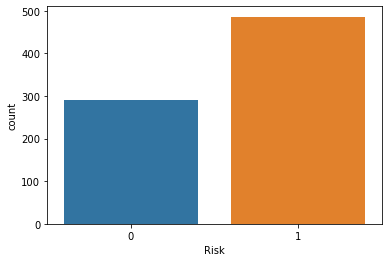

In [250]:
sns.countplot(data['Risk'], label = "Count")
data.Risk.value_counts()

<AxesSubplot:>

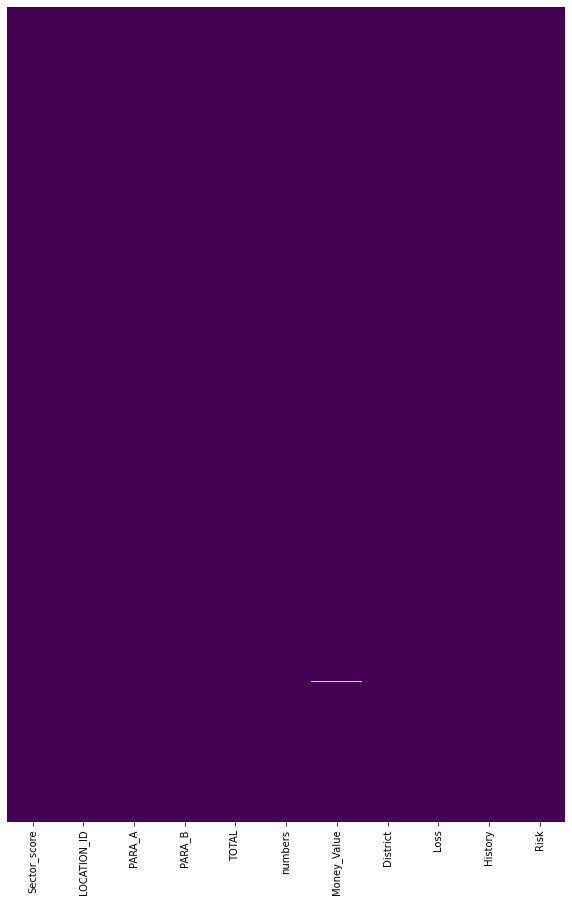

In [251]:
plt.figure(figsize = (10,15))
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

In [252]:
data[data.Money_Value.isnull()]

,Sector_score,LOCATION_ID,PARA_A,PARA_B,TOTAL,numbers,Money_Value,District,Loss,History,Risk
642,55.57,4,0.23,0.0,0.23,5.0,NaN,2,0,0,0


In [254]:
data.Money_Value.describe()

count    775.000000
mean      14.137631
std       66.606519
min        0.000000
25%        0.000000
50%        0.090000
75%        5.595000
max      935.030000
Name: Money_Value, dtype: float64

In [220]:
print(data.Money_Value.mean())
print(data.Money_Value.std())
print(data.Money_Value.mode())
print(data.Money_Value.median())

14.13763096774195
66.60651928510538
0    0.0
dtype: float64
0.09


In [235]:
print(len(data.Money_Value.value_counts()))
data.Money_Value.value_counts()

328


0.00     332
0.04      11
0.02       9
0.06       8
0.11       7
        ... 
6.78       1
27.10      1
1.08       1
16.03      1
98.75      1
Name: Money_Value, Length: 328, dtype: int64

/home/suman/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Money_Value', ylabel='Density'>

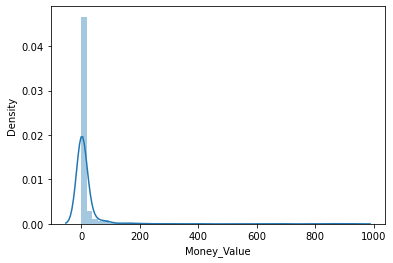

In [207]:
sns.distplot(data["Money_Value"])

In [263]:
data["Money_Value"][642]=0

<ipython-input-263-1c3e5eb78026>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Money_Value"][642]=0


In [267]:
data[data.Money_Value>5].Risk.unique()

array([1])

In [196]:
data.Sector_score.value_counts()

55.57    200
3.89     114
1.85      95
2.72      82
3.41      76
2.37      74
1.99      47
21.61     41
59.85     37
2.34       5
15.56      3
2.36       1
17.68      1
Name: Sector_score, dtype: int64

In [268]:
len(set(data.Sector_score))

13

In [383]:
len(set(data.LOCATION_ID))

45

/home/suman/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


10.799988402061862
50.083623608667295
0    0.0
dtype: float64
0.405


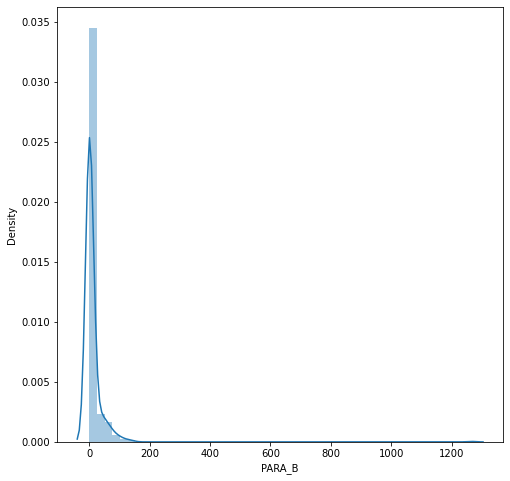

In [271]:
variable="PARA_B"
plt.figure(figsize = (8,8))
sns.distplot(data[variable])
print(data[variable].mean())
print(data[variable].std())
print(data[variable].mode())
print(data[variable].median())

In [216]:
set(data[data.PARA_B>=data.PARA_B.mean()].Risk)

{1}

<AxesSubplot:>

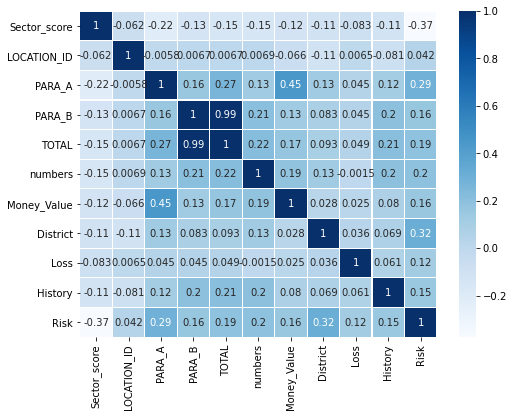

In [382]:
plt.figure(figsize = (8,6))
sns.heatmap(data.corr(),cmap="Blues",annot=True,linewidths=.1)

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sector_score  776 non-null    float64
 1   LOCATION_ID   776 non-null    object 
 2   PARA_A        776 non-null    float64
 3   PARA_B        776 non-null    float64
 4   TOTAL         776 non-null    float64
 5   numbers       776 non-null    float64
 6   Money_Value   775 non-null    float64
 7   District      776 non-null    int64  
 8   Loss          776 non-null    int64  
 9   History       776 non-null    int64  
 10  Risk          776 non-null    int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 66.8+ KB


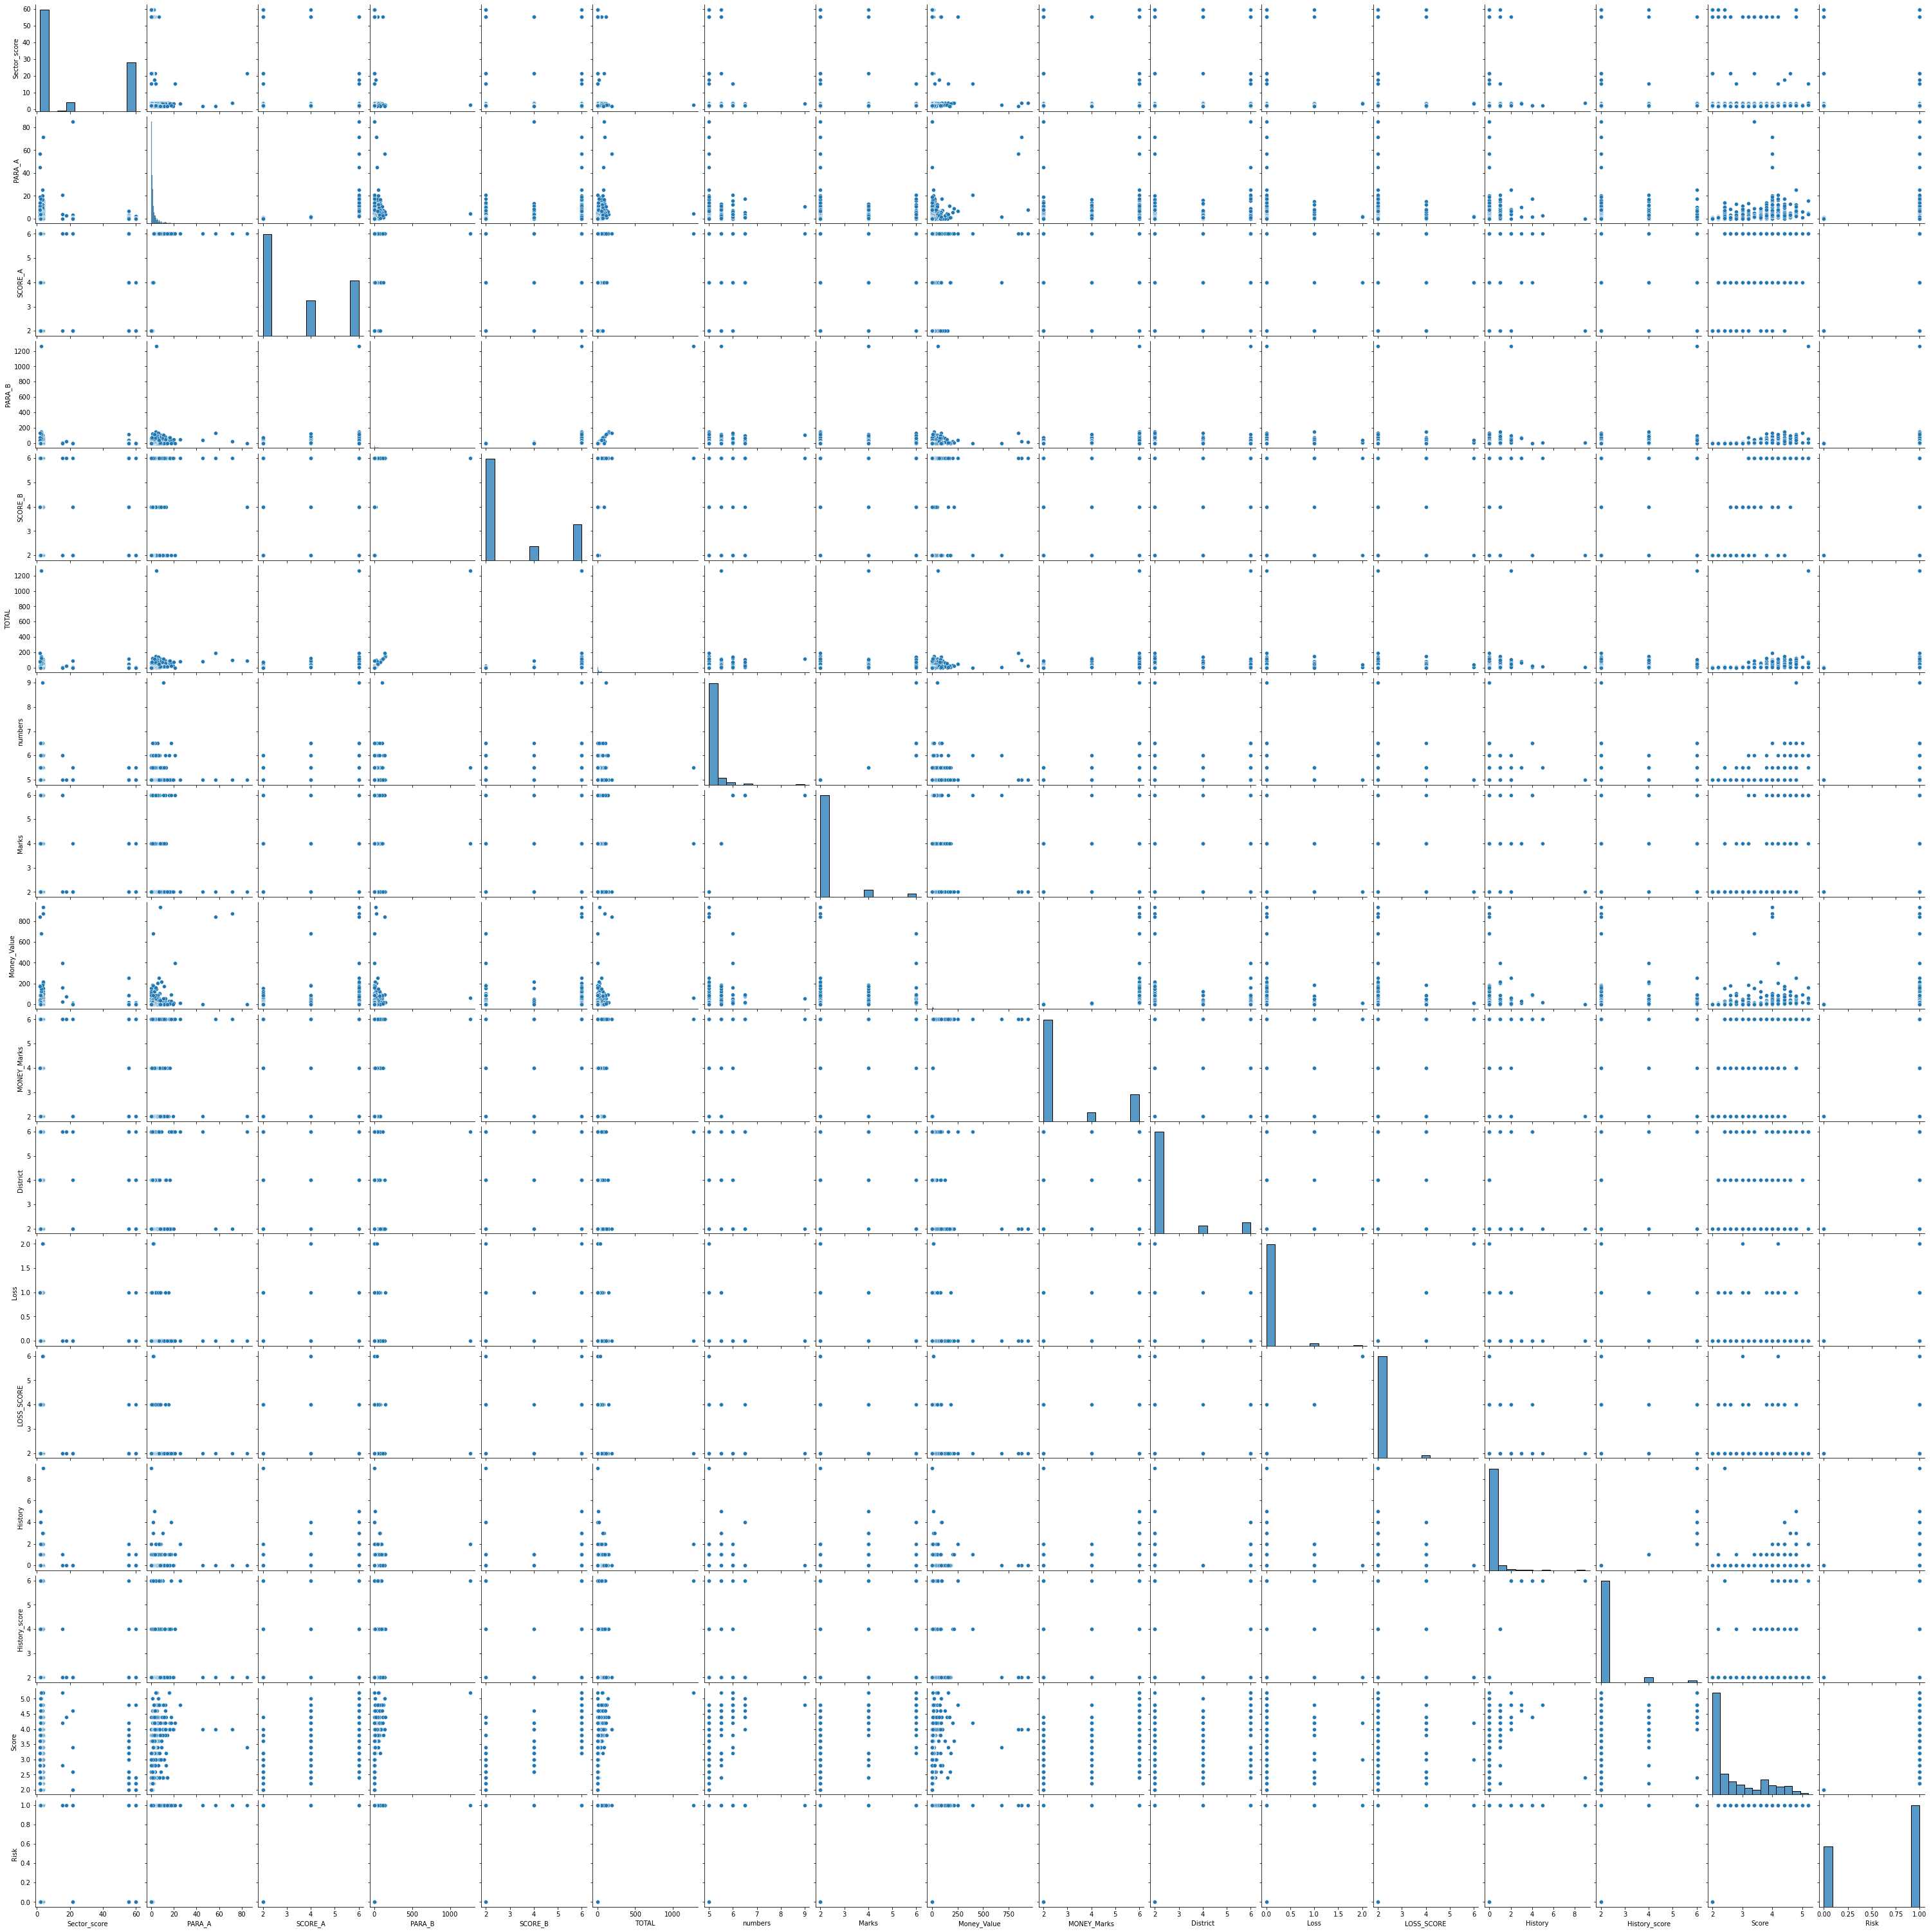

In [212]:
sns.pairplot(data)

In [272]:
data.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers',
       'Money_Value', 'District', 'Loss', 'History', 'Risk'],
      dtype='object')

Sector_score

20.184536082474136
24.319017128722137
0    55.57
dtype: float64
3.89


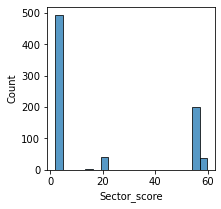

In [446]:
variable="Sector_score"
plt.figure(figsize = (3,3))
sns.histplot(data[variable],bins=20)
print(data[variable].mean())
print(data[variable].std())
print(data[variable].mode())
print(data[variable].median())

In [338]:
data.Sector_score.unique()

array([ 3.89,  3.41,  2.72,  2.37,  1.99,  1.85,  2.36,  2.34, 15.56,
       17.68, 21.61, 59.85, 55.57])

In [330]:
data[data.Sector_score>58].Risk.unique()

array([1, 0])

In [344]:
np.sort(list(data.LOCATION_ID.unique()))

array(['1', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2',
       '20', '21', '22', '23', '24', '25', '27', '28', '29', '3', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40',
       '41', '42', '43', '44', '5', '6', '7', '8', '9', 'LOHARU', 'NUH',
       'SAFIDON'], dtype='<U7')

In [346]:
data.LOCATION_ID.value_counts()

8          76
19         68
9          53
16         52
12         47
5          44
2          41
4          37
15         35
13         35
6          33
32         29
11         26
22         24
29         21
14         20
18         16
31         12
1          11
37         10
39          9
28          8
27          8
21          8
43          7
25          6
20          5
36          4
38          4
30          4
7           4
40          3
3           3
35          2
17          1
42          1
SAFIDON     1
33          1
NUH         1
24          1
41          1
44          1
23          1
34          1
LOHARU      1
Name: LOCATION_ID, dtype: int64

In [367]:
to_replace={"LOHARU":10,"NUH":26,"SAFIDON":45}
data.replace(to_replace,inplace=True)

In [368]:
data[data.LOCATION_ID=="SAFIDON"].LOCATION_ID

Series([], Name: LOCATION_ID, dtype: object)

In [373]:
data[351:352]
data[355:356]
data[367:368]

,Sector_score,LOCATION_ID,PARA_A,PARA_B,TOTAL,numbers,Money_Value,District,Loss,History,Risk
367,1.99,45,0.48,0.0,0.48,5.0,0.47,2,0,0,0


In [378]:
data.LOCATION_ID=data.LOCATION_ID.astype(int)

/home/suman/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


14.903350515463918
9.940841224133498
0    8
dtype: int64
13.0


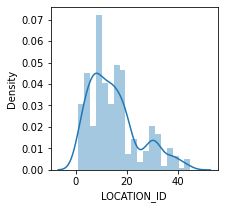

In [439]:
variable="LOCATION_ID"
plt.figure(figsize = (3,3))
sns.distplot(data[variable])
print(data[variable].mean())
print(data[variable].std())
print(data[variable].mode())
print(data[variable].median())

In [380]:
data.LOCATION_ID.value_counts()

8     76
19    68
9     53
16    52
12    47
5     44
2     41
4     37
13    35
15    35
6     33
32    29
11    26
22    24
29    21
14    20
18    16
31    12
1     11
37    10
39     9
27     8
21     8
28     8
43     7
25     6
20     5
7      4
30     4
36     4
38     4
40     3
3      3
35     2
10     1
45     1
17     1
44     1
24     1
26     1
33     1
34     1
41     1
42     1
23     1
Name: LOCATION_ID, dtype: int64

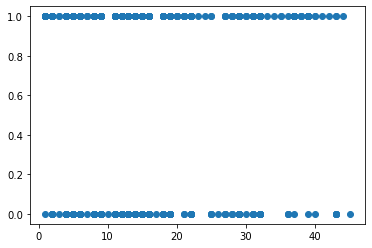

In [393]:
plt.scatter(data.LOCATION_ID,y=data.Risk)

In [390]:
data[(data.LOCATION_ID<45) & (data.LOCATION_ID>40)].Risk.unique()

array([1, 0])

PARA_A

/home/suman/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


2.450194072164947
5.678870370534326
0    0.0
dtype: float64
0.875


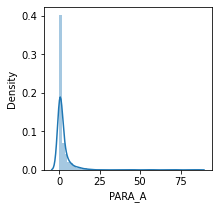

In [438]:
variable="PARA_A"
plt.figure(figsize = (3,3))
sns.distplot(data[variable])
print(data[variable].mean())
print(data[variable].std())
print(data[variable].mode())
print(data[variable].median())

In [307]:
data[data.PARA_A>5].Risk.unique()

array([1])

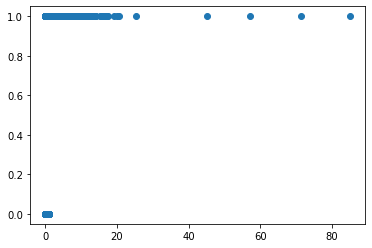

In [394]:
plt.scatter(data.PARA_A,y=data.Risk)

PARA_B

/home/suman/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


10.799988402061862
50.083623608667295
0    0.0
dtype: float64
0.405


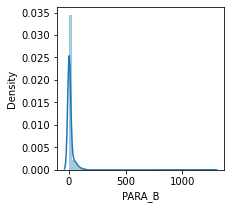

In [437]:
variable="PARA_B"
plt.figure(figsize = (3,3))
sns.distplot(data[variable])
print(data[variable].mean())
print(data[variable].std())
print(data[variable].mode())
print(data[variable].median())

In [309]:
data[data.PARA_B>5].Risk.unique()

array([1])

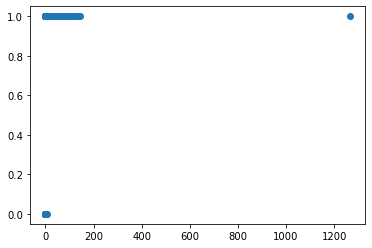

In [395]:
plt.scatter(data.PARA_B,y=data.Risk)

TOTAL

/home/suman/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


13.218481443298984
51.31282925864567
0    0.0
dtype: float64
1.37


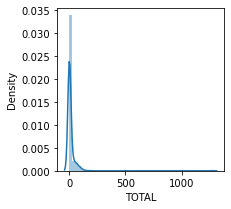

In [436]:
variable="TOTAL"
plt.figure(figsize = (3,3))
sns.distplot(data[variable])
print(data[variable].mean())
print(data[variable].std())
print(data[variable].mode())
print(data[variable].median())

In [310]:
data[data.TOTAL>5].Risk.unique()

array([1])

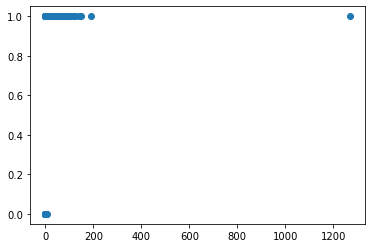

In [396]:
plt.scatter(data.TOTAL,y=data.Risk)

numbers

5.067654639175258
0.26444862039735006
0    5.0
dtype: float64
5.0


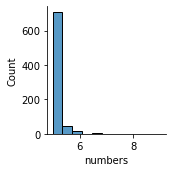

In [441]:
variable="numbers"
#plt.figure(figsize = (8,8))
sns.displot(data[variable],height=2.5)
print(data[variable].mean())
print(data[variable].std())
print(data[variable].mode())
print(data[variable].median())

In [337]:
data.numbers.unique()

array([5. , 6. , 5.5, 6.5, 9. ])

In [313]:
data[data.numbers>5].Risk.unique()

array([1])

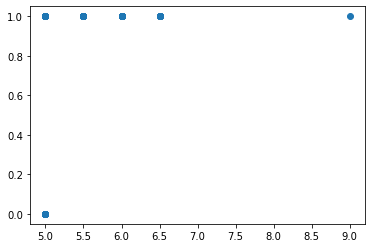

In [397]:
plt.scatter(data.numbers,y=data.Risk)

Money_Value

/home/suman/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


14.119412371134036
66.56546818971657
0    0.0
dtype: float64
0.09


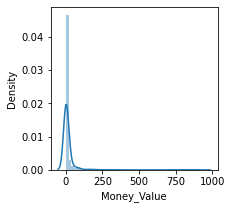

In [434]:
variable="Money_Value"
plt.figure(figsize = (3,3))
sns.distplot(data[variable])
print(data[variable].mean())
print(data[variable].std())
print(data[variable].mode())
print(data[variable].median())

District

2.5051546391752577
1.2286784830725805
0    2
dtype: int64
2.0


<Figure size 576x576 with 0 Axes>

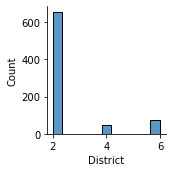

In [443]:
variable="District"
plt.figure(figsize = (8,8))
sns.displot(data[variable],height=2.5)
print(data[variable].mean())
print(data[variable].std())
print(data[variable].mode())
print(data[variable].median())

In [316]:
data[data.District>=4].Risk.unique()

array([1])

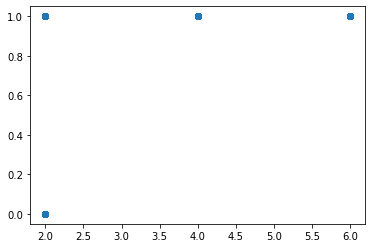

In [398]:
plt.scatter(data.District,y=data.Risk)

Loss

0.029639175257731958
0.18427993771423767
0    0
dtype: int64
0.0


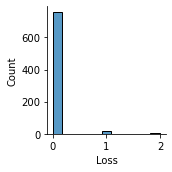

In [444]:
variable="Loss"
#plt.figure(figsize = (8,8))
sns.displot(data[variable],height=2.5)
print(data[variable].mean())
print(data[variable].std())
print(data[variable].mode())
print(data[variable].median())

In [322]:
data.Loss.value_counts()

0    755
1     19
2      2
Name: Loss, dtype: int64

In [323]:
data[data.Loss>0].Risk.unique()

array([1])

History

0.10438144329896908
0.5310307725641077
0    0
dtype: int64
0.0


<Figure size 576x576 with 0 Axes>

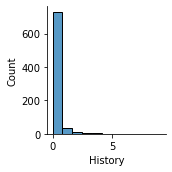

In [445]:
variable="History"
plt.figure(figsize = (8,8))
sns.displot(data[variable],height=2.5)
print(data[variable].mean())
print(data[variable].std())
print(data[variable].mode())
print(data[variable].median())

In [327]:
data.History.value_counts()

0    726
1     35
2      9
4      2
3      2
9      1
5      1
Name: History, dtype: int64

In [447]:
data.History.describe()

count    776.000000
mean       0.104381
std        0.531031
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        9.000000
Name: History, dtype: float64

In [326]:
data[data.History>1].Risk.unique()

array([1])

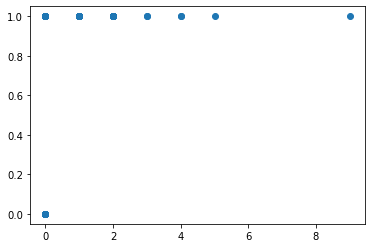

In [399]:
plt.scatter(data.History,y=data.Risk)

<AxesSubplot:>

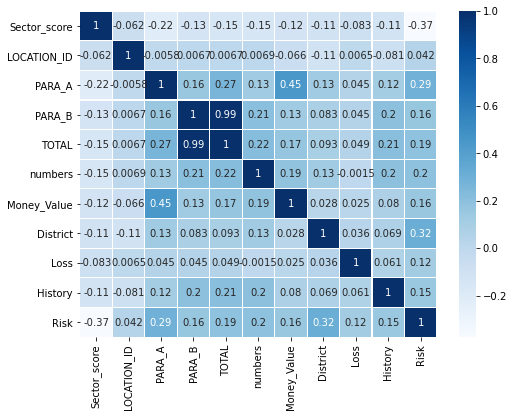

In [381]:
plt.figure(figsize = (8,6))
sns.heatmap(data.corr(),cmap="Blues",annot=True,linewidths=.1)

In [430]:
data[data.PARA_A>data.PARA_A.quantile([.75])[0:1].values[0]].Risk.unique()

array([1])

In [418]:
data.PARA_A.quantile([.25])[0:1].values[0]

0.21

In [427]:
data.PARA_A.median()

0.875

In [431]:
for i in data.columns:
    print(i,data[data[i]>data[i].quantile([.75])[0:1].values[0]].Risk.unique())

Sector_score [1 0]
LOCATION_ID [1 0]
PARA_A [1]
PARA_B [0 1]
TOTAL [1]
numbers [1]
Money_Value [1]
District [1]
Loss [1]
History [1]
Risk []


In [449]:
data[data.PARA_B>data.PARA_B.quantile([.75])[0:1].values[0]].Risk.value_counts()

1    192
0      1
Name: Risk, dtype: int64

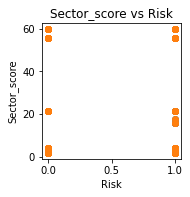

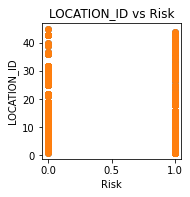

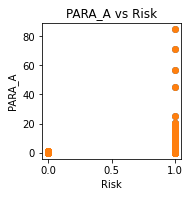

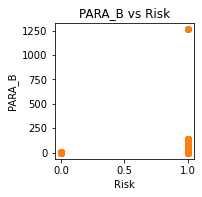

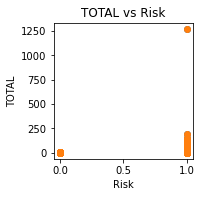

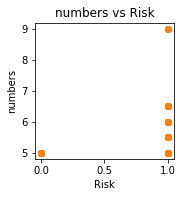

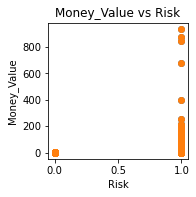

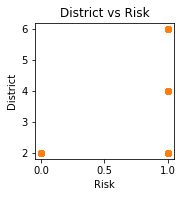

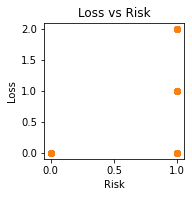

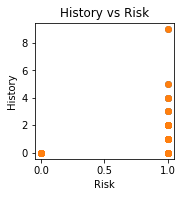

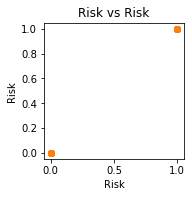

In [464]:
for i in data.columns:
    plt.figure(figsize=(2.5,2.5))
    img=plt.scatter(x=data.Risk,y=data[i])
    plt.scatter(x=data.Risk,y=data[i])
    plt.title(i+" vs "+"Risk")
    plt.xlabel("Risk")
    plt.ylabel(i)
    #plt.savefig("/home/suman/Documents/predective_analysis/project/data_plots/"+i+" vs "+"Risk.png")
    plt.show()